In [2]:
!pip install praw pandas nltk emoji



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.9 MB/s eta 0:00:00


In [3]:
import praw
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# ==== Reddit API Credentials (from your screenshot) ====
reddit = praw.Reddit(
    client_id="MYFYxxxxxxxxAoskjCOCw8g",
    client_secret="RwixxxxxxxJwYQf7CdidO_YJg",
    user_agent="gsoc-script by Ok-Text-8499"
)

# ==== Crisis-related keywords ====
keywords = [
    "depressed", "addiction", "suicidal", "help me", "overwhelmed",
    "mental breakdown", "panic", "relapse", "can't cope", "hopeless", "lost", "feeling empty"
]

# ==== Text Cleaning Function ====
def clean_text(text):
    text = emoji.replace_emoji(text, "")
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()  # Simpler than word_tokenize
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return " ".join(tokens)


# ==== Data Extraction ====
posts = []
subreddits = ["mentalhealth", "depression", "SuicideWatch", "Addiction", "offmychest"]

for sub in subreddits:
    print(f"🔍 Scraping r/{sub}...")
    for submission in reddit.subreddit(sub).new(limit=300):  # fetch latest 300 posts
        full_text = submission.title + " " + submission.selftext
        if any(kw in full_text.lower() for kw in keywords):
            posts.append({
                "post_id": submission.id,
                "subreddit": sub,
                "timestamp": submission.created_utc,
                "raw_text": full_text,
                "cleaned_text": clean_text(full_text),
                "num_comments": submission.num_comments,
                "score": submission.score
            })

# ==== Save to CSV ====
df = pd.DataFrame(posts)
df.to_csv("reddit_crisis_posts.csv", index=False)

print(f"\n✅ Done! Saved {len(df)} posts to reddit_crisis_posts.csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/mentalhealth...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/depression...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/SuicideWatch...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/Addiction...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔍 Scraping r/offmychest...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




✅ Done! Saved 563 posts to reddit_crisis_posts.csv


                                        cleaned_text sentiment   risk_level
0  stress cause im teenager f past couple months ...   Neutral  Low Concern
1  dont know alone last years always relationship...  Positive  Low Concern
2  accepted new job cant get bed im yo male lifel...   Neutral  Low Concern
3  uncertainty hellogood day everyone brother str...  Negative  Low Concern
4  whats phenomenon hey idea suddenly lost drive ...  Positive    High Risk


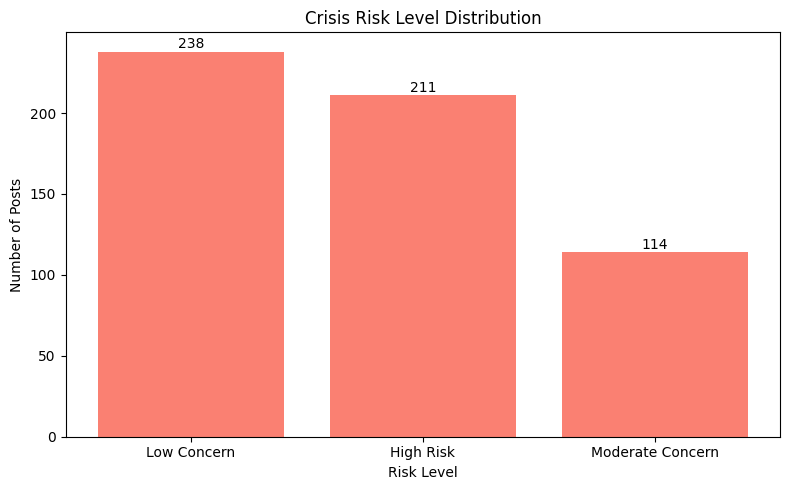

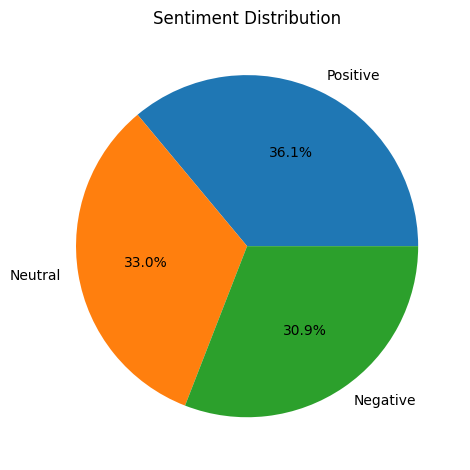

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import nltk

# Load the uploaded dataset
df = pd.read_csv("reddit_crisis_posts.csv")

# Drop rows with empty text
df = df.dropna(subset=['cleaned_text'])

# Apply sentiment analysis using TextBlob
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(classify_sentiment)

# Create TF-IDF embeddings
tfidf = TfidfVectorizer(max_features=300, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

# Cluster using KMeans to simulate risk levels based on semantic patterns
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(tfidf_matrix)

# Assign cluster to risk levels based on proximity to crisis-related phrases
cluster_centers = kmeans.cluster_centers_
keywords = ["want to disappear", "i want to die", "can’t do this anymore", "help me", "feeling empty", "struggling"]
crisis_matrix = tfidf.transform(keywords)
similarities = cosine_similarity(cluster_centers, crisis_matrix)
risk_mapping = similarities.mean(axis=1).argsort()[::-1]  # highest mean similarity = High Risk

# Map clusters to human-readable risk labels
cluster_to_risk = {risk_mapping[0]: 'High Risk', risk_mapping[1]: 'Moderate Concern', risk_mapping[2]: 'Low Concern'}
df['risk_level'] = [cluster_to_risk[c] for c in clusters]

# Show output to user
print(df[['cleaned_text', 'sentiment', 'risk_level']].head())



# Count risk level values
risk_counts = df['risk_level'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(risk_counts.index, risk_counts.values, color='salmon')
plt.title('Crisis Risk Level Distribution')
plt.ylabel('Number of Posts')
plt.xlabel('Risk Level')
plt.xticks(rotation=0)

# Add number labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{int(height)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Sentiment pie chart
df['sentiment'].value_counts().plot(kind='pie', title='Sentiment Distribution', autopct='%1.1f%%')
plt.ylabel("")
plt.tight_layout()
plt.show()

# Save result
df.to_csv("reddit_crisis_labeled_combined.csv", index=False)


In [9]:
!pip install folium geopy spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
import spacy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeopyError
import folium
from folium.plugins import HeatMap
import time

# === Load labeled dataset from Task 2 ===
df = pd.read_csv("reddit_crisis_labeled_combined.csv")

# === Load spaCy English NER model ===
nlp = spacy.load("en_core_web_sm")

# === Function to extract first GPE/LOC from post text ===
def extract_location_spacy(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ("GPE", "LOC"):
            return ent.text
    return None

# === Apply location extraction ===
df["location_guess"] = df["raw_text"].fillna("").apply(extract_location_spacy)

# === Get top 5 most frequent locations ===
location_counts = df["location_guess"].dropna().value_counts().head(5)
top_locations = location_counts.index.tolist()

# === Initialize geocoder ===
geolocator = Nominatim(user_agent="gsoc_crisis_mapper")

def safe_geocode(place):
    try:
        return geolocator.geocode(place, timeout=10)
    except (GeocoderTimedOut, GeopyError):
        time.sleep(1)
        return safe_geocode(place)

# === Geocode and store (lat, lon, weight) ===
lat_lon_weight = []
for place in top_locations:
    loc = safe_geocode(place)
    if loc:
        lat_lon_weight.append((
            float(loc.latitude),
            float(loc.longitude),
            int(location_counts[place])
        ))
        print(f"✅ Geocoded: {place} → ({loc.latitude}, {loc.longitude})")
    else:
        print(f"⚠️ Failed to geocode: {place}")

# === Create base map centered on USA ===
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# === Add heatmap layer ===
HeatMap(lat_lon_weight).add_to(m)

# === Add marker labels for top locations ===
for lat, lon, weight in lat_lon_weight:
    folium.Marker(
        location=[lat, lon],
        popup=f"Posts: {weight}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# === Save map ===
m.save("crisis_heatmap.html")
print("✅ Crisis heatmap saved as 'crisis_heatmap.html'")

# Optional: display in notebook (if supported)
m


✅ Geocoded: n’t → (37.9456724, 23.7139908)
⚠️ Failed to geocode: Reddit
✅ Geocoded: meth → (31.161862, 77.5101328)
✅ Geocoded: Idk → (35.1623028, 129.1630181)
✅ Geocoded: Earth → (34.2331373, -102.4107493)
✅ Crisis heatmap saved as 'crisis_heatmap.html'


In [19]:
!pip install spacy geotext
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
!pip install geotext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00


In [8]:
import pandas as pd
import spacy
from geotext import GeoText

# Load labeled Reddit dataset
df = pd.read_csv("reddit_crisis_labeled_combined.csv")

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Function to extract first GPE/LOC entity using spaCy
def extract_location(text):
    doc = nlp(str(text))
    for ent in doc.ents:
        if ent.label_ in ("GPE", "LOC"):
            return ent.text
    return None

# Apply location extraction to each post
df['location_guess'] = df['raw_text'].apply(extract_location)

# Count frequency of each extracted location
location_counts = df["location_guess"].dropna().value_counts()

# Validate locations using GeoText (keeps real cities/countries only)
valid_locations = []
for loc, count in location_counts.items():
    places = GeoText(loc)
    if loc in places.cities or loc in places.countries:
        valid_locations.append((loc, count))
    if len(valid_locations) == 5:
        break

# Display cleaned top 5
print("✅ Cleaned Top 5 Crisis-Related Locations:\n")
for i, (loc, count) in enumerate(valid_locations, 1):
    print(f"{i}. {loc} — {count} posts")

# Save for heatmap or report
pd.DataFrame(valid_locations, columns=["Location", "Post Count"]).to_csv("top_5_clean_locations.csv", index=False)
print("✅ Saved as 'top_5_clean_locations.csv'")


✅ Cleaned Top 5 Crisis-Related Locations:

1. India — 2 posts
2. Chicago — 2 posts
3. Germany — 2 posts
4. Netherlands — 1 posts
5. Belarus — 1 posts
✅ Saved as 'top_5_clean_locations.csv'


In [14]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from folium.plugins import HeatMap
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="gsoc_crisis_mapper")

# Safe geocode with retry
def safe_geocode(place):
    try:
        return geolocator.geocode(place, timeout=10)
    except GeocoderTimedOut:
        time.sleep(1)
        return safe_geocode(place)

# Geocode the validated locations
lat_lon_weight = []
for loc, count in valid_locations:
    location = safe_geocode(loc)
    if location:
        lat_lon_weight.append((location.latitude, location.longitude, count))
        print(f"📍 {loc} → ({location.latitude}, {location.longitude})")
    else:
        print(f"⚠️ Failed to geocode: {loc}")


# Create Folium heatmap
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
HeatMap(lat_lon_weight).add_to(m)

# Save map
m.save("crisis_heatmap.html")
print("\n✅ Heatmap saved as 'crisis_heatmap.html'")
print("✅ Cleaned Top 5 Crisis-Related Locations:\n")
for i, (loc, count) in enumerate(valid_locations, 1):
    print(f"{i}. {loc} — {count} posts")
m

📍 India → (22.3511148, 78.6677428)
📍 Chicago → (41.8755616, -87.6244212)
📍 Germany → (51.1638175, 10.4478313)
📍 Netherlands → (52.2434979, 5.6343227)
📍 Belarus → (53.4250605, 27.6971358)

✅ Heatmap saved as 'crisis_heatmap.html'
✅ Cleaned Top 5 Crisis-Related Locations:

1. India — 2 posts
2. Chicago — 2 posts
3. Germany — 2 posts
4. Netherlands — 1 posts
5. Belarus — 1 posts
